In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib import cm
from matplotlib.colors import Normalize

In [160]:
import os
path= r'C:\Users\nayan\Downloads\Sales_data\Sales_data'

csv_files = [i for i in os.listdir(path) if i.endswith(".csv")]

dfs=[]
for i in csv_files:
    DF=pd.read_csv(path+"//"+i)
    dfs.append(DF)

 
df = pd.concat(dfs, ignore_index=True)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [161]:
dfs[0].shape

(18383, 6)

In [162]:
df.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [163]:
df.shape

(186850, 6)

In [164]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [165]:
df.isnull().all(axis=1).sum() # checking complete row is null or not

545

  Removing null values from Dataframe

In [167]:
df.dropna(how='all',inplace=True) # Removing null values from data

In [168]:
df.shape

(186305, 6)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [170]:
df.duplicated().sum() # Checking duplicated data

618

In [171]:
# removing duplicated data

In [172]:
df.drop_duplicates(keep='first',inplace=True) # Removing duplicates by keeping first data
df.duplicated().sum()

0

In [173]:
df.shape

(185687, 6)

In [174]:
unique={}
for i in df.columns:
    unique[i]=df[i].unique() # Checking unique values of each of columns
unique

{'Order ID': array(['176558', '176559', '176560', ..., '259355', '259356', '259357'],
       dtype=object),
 'Product': array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
        'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
        'Lightning Charging Cable', '27in 4K Gaming Monitor',
        'AA Batteries (4-pack)', 'Apple Airpods Headphones',
        'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
        '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
        'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor',
        'Product'], dtype=object),
 'Quantity Ordered': array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
       dtype=object),
 'Price Each': array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
        '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
        '999.99', '400', '379.99', 'Price Each', '700.0', '1700.0',
        '150.0', '300.0', '400.0'], dtype=o

removing incosistent data in columns

In [176]:
unique={}
for i in df.columns:
    df=df.drop(df[df[i]==i].index)
    unique[i]=df[i].unique()
unique

{'Order ID': array(['176558', '176559', '176560', ..., '259355', '259356', '259357'],
       dtype=object),
 'Product': array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
        'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
        'Lightning Charging Cable', '27in 4K Gaming Monitor',
        'AA Batteries (4-pack)', 'Apple Airpods Headphones',
        'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
        '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
        'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
       dtype=object),
 'Quantity Ordered': array(['2', '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object),
 'Price Each': array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
        '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
        '999.99', '400', '379.99', '700.0', '1700.0', '150.0', '300.0',
        '400.0'], dtype=object),
 'Order Date': array(['04/19/19 08:46', '04/0

Checking Inconsistent data

In [178]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [179]:
df.rename(columns={'Order ID': 'Order_id', 'Product': 'Product_name','Quantity Ordered':'Quantity_Ordered',
                        'Price Each':'Product_price','Order Date':'Order_date','Purchase Address':'Purchase_address'},
               inplace=True)

In [180]:
df.columns

Index(['Order_id', 'Product_name', 'Quantity_Ordered', 'Product_price',
       'Order_date', 'Purchase_address'],
      dtype='object')

In [181]:
# checking inconsistent values in data frame

In [182]:
v_count={}

for i in df.columns:
    v_count[i]=df[i].value_counts()

v_count

{'Order_id': Order_id
 160873    5
 296353    4
 304802    4
 235798    4
 194253    4
          ..
 158126    1
 158127    1
 158128    1
 158129    1
 259357    1
 Name: count, Length: 178437, dtype: int64,
 'Product_name': Product_name
 USB-C Charging Cable          21859
 Lightning Charging Cable      21610
 AAA Batteries (4-pack)        20612
 AA Batteries (4-pack)         20558
 Wired Headphones              18849
 Apple Airpods Headphones      15525
 Bose SoundSport Headphones    13298
 27in FHD Monitor               7498
 iPhone                         6840
 27in 4K Gaming Monitor         6225
 34in Ultrawide Monitor         6174
 Google Phone                   5522
 Flatscreen TV                  4794
 Macbook Pro Laptop             4721
 ThinkPad Laptop                4126
 20in Monitor                   4098
 Vareebadd Phone                2065
 LG Washing Machine              666
 LG Dryer                        646
 Name: count, dtype: int64,
 'Quantity_Ordered': Quantity_

In [183]:
df['Order_id']=df['Order_id'].astype(int)
df['Quantity_Ordered']=df['Quantity_Ordered'].astype(int)
df['Product_price']=df['Product_price'].astype(float)
df['Order_date']=pd.to_datetime(df['Order_date'],format='%m/%d/%y %H:%M')

In [184]:
df.dtypes

Order_id                     int32
Product_name                object
Quantity_Ordered             int32
Product_price              float64
Order_date          datetime64[ns]
Purchase_address            object
dtype: object

In [185]:
df['Order_date']=pd.to_datetime(df['Order_date']) # it will give months number
df['Month_name']=df['Order_date'].dt.strftime('%B') # it will give complete months names


In [186]:
df['month_name']=df['Order_date'].dt.strftime('%b') # it will give only starting 3 char complete months names


In [187]:
df['month_name']

0         Apr
2         Apr
3         Apr
4         Apr
5         Apr
         ... 
186845    Sep
186846    Sep
186847    Sep
186848    Sep
186849    Sep
Name: month_name, Length: 185686, dtype: object

In [188]:
df['Dates']=df['Order_date'].dt.date
df['Time']=df['Order_date'].dt.time
df['Day']=df['Order_date'].dt.day_name()
df['Hour']=df['Order_date'].dt.hour

In [189]:
df['Hour']

0          8
2         22
3         14
4         14
5          9
          ..
186845    20
186846    16
186847     7
186848    17
186849     0
Name: Hour, Length: 185686, dtype: int32

Seperate Numericala and Categorical Data

In [191]:
cat=df[[i for i in df.columns if df[i].dtype=='object']]
num=df[[i for i in df.columns if df[i].dtype in ['int32', 'float64'] and i not in ["Order_id"]]]
num

,Quantity_Ordered,Product_price,Hour
0,2,11.95,8
2,1,99.99,22
3,1,600.00,14
4,1,11.99,14
5,1,11.99,9
...,...,...,...
186845,3,2.99,20
186846,1,700.00,16
186847,1,700.00,7
186848,1,379.99,17


In [192]:

cat

,Product_name,Purchase_address,Month_name,month_name,Dates,Time,Day
0,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",April,Apr,2019-04-19,08:46:00,Friday
2,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",April,Apr,2019-04-07,22:30:00,Sunday
3,Google Phone,"669 Spruce St, Los Angeles, CA 90001",April,Apr,2019-04-12,14:38:00,Friday
4,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",April,Apr,2019-04-12,14:38:00,Friday
5,Wired Headphones,"333 8th St, Los Angeles, CA 90001",April,Apr,2019-04-30,09:27:00,Tuesday
...,...,...,...,...,...,...,...
186845,AAA Batteries (4-pack),"840 Highland St, Los Angeles, CA 90001",September,Sep,2019-09-17,20:56:00,Tuesday
186846,iPhone,"216 Dogwood St, San Francisco, CA 94016",September,Sep,2019-09-01,16:00:00,Sunday
186847,iPhone,"220 12th St, San Francisco, CA 94016",September,Sep,2019-09-23,07:39:00,Monday
186848,34in Ultrawide Monitor,"511 Forest St, San Francisco, CA 94016",September,Sep,2019-09-19,17:30:00,Thursday


checking outlier in the data

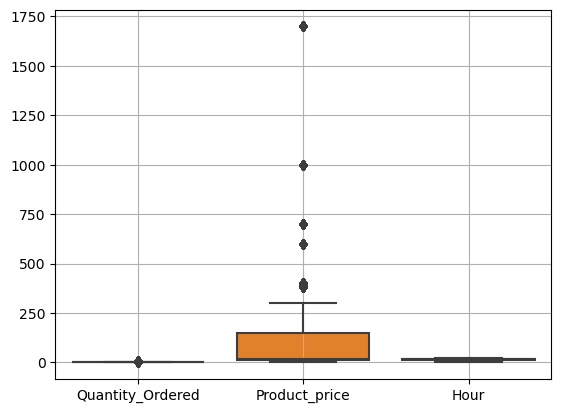

In [194]:
sns.boxplot(num)
plt.gca().grid(True)
plt.show()

In [195]:
q1=num.quantile(0.25)
q3=num.quantile(0.75)
IQR =q3-q1
IQR_upper=(q3+1.5 * IQR)
IQR_lower=(q1-1.5 * IQR)
IQR_lower

Quantity_Ordered      1.000
Product_price      -195.125
Hour                 -1.000
dtype: float64

In [196]:
# replacing the outlier data by mean values

In [197]:
df.loc[(df['Product_price'] >357.075) | (df['Product_price'] < -195.75),'Product_price']=df['Product_price'].mean()
df.Product_price.mean()                                        

77.80490927328098

<Axes: >

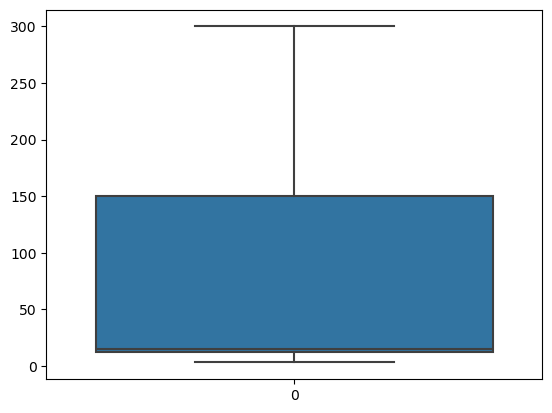

In [198]:
sns.boxplot(df['Product_price'])

In [199]:
# Now all the outliers are replaced by the mean values

In [200]:
# describing data to check mean , max and min values

In [201]:
num.describe()

,Quantity_Ordered,Product_price,Hour
count,185686.000000,185686.000000,185686.000000
mean,1.124544,184.519255,14.412934
std,0.443069,332.843838,5.423329
min,1.000000,2.990000,0.000000
25%,1.000000,11.950000,11.000000
50%,1.000000,14.950000,15.000000
75%,1.000000,150.000000,19.000000
max,9.000000,1700.000000,23.000000


Performing data analysis on dataframe

In [242]:
df.head(7)

,Order_id,Product_name,Quantity_Ordered,Product_price,Order_date,Purchase_address,Month_name,month_name,Dates,Time,Day,Hour
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,Apr,2019-04-19,08:46:00,Friday,8
2,176559,Bose SoundSport Headphones,1,99.990000,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,Apr,2019-04-07,22:30:00,Sunday,22
3,176560,Google Phone,1,184.519255,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Apr,2019-04-12,14:38:00,Friday,14
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Apr,2019-04-12,14:38:00,Friday,14
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,Apr,2019-04-30,09:27:00,Tuesday,9
6,176562,USB-C Charging Cable,1,11.950000,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",April,Apr,2019-04-29,13:03:00,Monday,13
7,176563,Bose SoundSport Headphones,1,99.990000,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",April,Apr,2019-04-02,07:46:00,Tuesday,7


In [244]:
df.drop(columns='month_name')

,Order_id,Product_name,Quantity_Ordered,Product_price,Order_date,Purchase_address,Month_name,Dates,Time,Day,Hour
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,2019-04-19,08:46:00,Friday,8
2,176559,Bose SoundSport Headphones,1,99.990000,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,2019-04-07,22:30:00,Sunday,22
3,176560,Google Phone,1,184.519255,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,2019-04-12,14:38:00,Friday,14
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,2019-04-12,14:38:00,Friday,14
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,2019-04-30,09:27:00,Tuesday,9
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.990000,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",September,2019-09-17,20:56:00,Tuesday,20
186846,259354,iPhone,1,184.519255,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September,2019-09-01,16:00:00,Sunday,16
186847,259355,iPhone,1,184.519255,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September,2019-09-23,07:39:00,Monday,7
186848,259356,34in Ultrawide Monitor,1,184.519255,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September,2019-09-19,17:30:00,Thursday,17


In [246]:
# insert , between state and zip

In [256]:
# splitting the address by the last two components
state_zip_split=df['Purchase_address'].str.rsplit(n=1,expand=True) # n=1 will be used to seperate the two
state_zip_split

,0,1
0,"917 1st St, Dallas, TX",75001
2,"682 Chestnut St, Boston, MA",02215
3,"669 Spruce St, Los Angeles, CA",90001
4,"669 Spruce St, Los Angeles, CA",90001
5,"333 8th St, Los Angeles, CA",90001
...,...,...
186845,"840 Highland St, Los Angeles, CA",90001
186846,"216 Dogwood St, San Francisco, CA",94016
186847,"220 12th St, San Francisco, CA",94016
186848,"511 Forest St, San Francisco, CA",94016


In [260]:
#Inserting a comma between the state and ZIP code
state_zip_split[0]=state_zip_split[0] + ','
df['Purchase_address']=state_zip_split[0] + state_zip_split[1]
df.head()

,Order_id,Product_name,Quantity_Ordered,Product_price,Order_date,Purchase_address,Month_name,month_name,Dates,Time,Day,Hour
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX,,75001",April,Apr,2019-04-19,08:46:00,Friday,8
2,176559,Bose SoundSport Headphones,1,99.990000,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA,,02215",April,Apr,2019-04-07,22:30:00,Sunday,22
3,176560,Google Phone,1,184.519255,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA,,90001",April,Apr,2019-04-12,14:38:00,Friday,14
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA,,90001",April,Apr,2019-04-12,14:38:00,Friday,14
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA,,90001",April,Apr,2019-04-30,09:27:00,Tuesday,9


In [264]:
# Seperate specific characters from purchase address column
df['Street']=df['Purchase_address'].str.split(',').str[0]
df['City']=df['Purchase_address'].str.split(',').str[1]
df['State']=df['Purchase_address'].str.split(',').str[2]
df['ZIP']=df['Purchase_address'].str.split(',').str[4]

In [266]:
df.head()

,Order_id,Product_name,Quantity_Ordered,Product_price,Order_date,Purchase_address,Month_name,month_name,Dates,Time,Day,Hour,Street,City,State,ZIP
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX,,75001",April,Apr,2019-04-19,08:46:00,Friday,8,917 1st St,Dallas,TX,75001
2,176559,Bose SoundSport Headphones,1,99.990000,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA,,02215",April,Apr,2019-04-07,22:30:00,Sunday,22,682 Chestnut St,Boston,MA,02215
3,176560,Google Phone,1,184.519255,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA,,90001",April,Apr,2019-04-12,14:38:00,Friday,14,669 Spruce St,Los Angeles,CA,90001
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA,,90001",April,Apr,2019-04-12,14:38:00,Friday,14,669 Spruce St,Los Angeles,CA,90001
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA,,90001",April,Apr,2019-04-30,09:27:00,Tuesday,9,333 8th St,Los Angeles,CA,90001


Visualisation

In [273]:
months_sale=df[['Product_price','Month_name']].groupby('Month_name').sum().sort_values('Product_price')
months_sale

,Product_price
Month_name,
January,7.628249e+05
September,8.875947e+05
February,9.327210e+05
August,9.433414e+05
June,1.074234e+06
July,1.119715e+06
March,1.179897e+06
May,1.284673e+06
November,1.351493e+06


In [279]:
percent_sales= (months_sale/months_sale['Product_price'].sum()*100).round(2)
percent_sales

,Product_price
Month_name,
January,5.28
September,6.14
February,6.46
August,6.53
June,7.44
July,7.75
March,8.17
May,8.89
November,9.35


In [285]:
percent_sales.sort_values('Month_name',ascending=True)

,Product_price
Month_name,
April,9.81
August,6.53
December,13.39
February,6.46
January,5.28
July,7.75
June,7.44
March,8.17
May,8.89


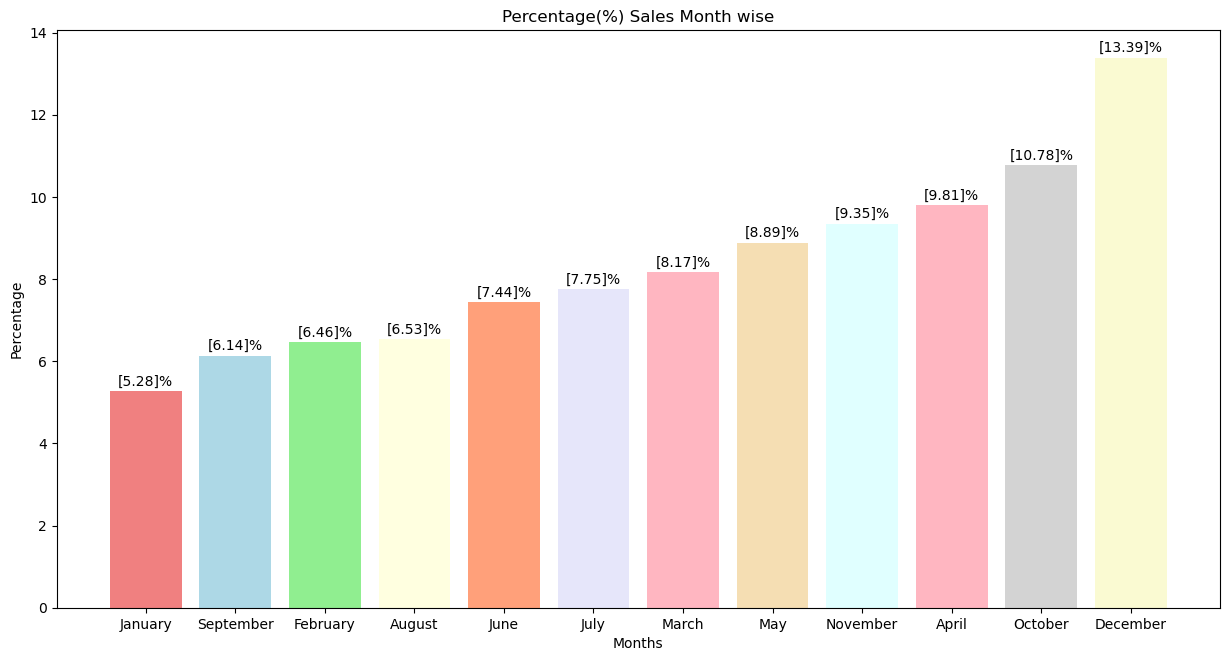

In [287]:
plt.figure(figsize=(15,7.5))

plt.bar(x=percent_sales.index, height=percent_sales['Product_price'],
        color = ['lightcoral', 'lightblue', 'lightgreen', 'lightyellow', 'lightsalmon', 
                 'lavender', 'lightpink', 'wheat', 'lightcyan', 'lightpink', 'lightgray', 'lightgoldenrodyellow'])

offset= max(percent_sales['Product_price']) * 0.01


for i,j in enumerate(percent_sales.values):
    plt.text(percent_sales.index[i], percent_sales.values[i]+ offset, str(f'{j}%'), ha='center')


plt.title("Percentage(%) Sales Month wise")
plt.xlabel("Months")
plt.ylabel("Percentage")
plt.show()


 Maximum sales is in december, minimum sales in january.
 Festival season in october and december has also resulted in increased sales


What is the preferred day most people placed orders

In [292]:
sale_day=df[['Day','Order_id']].groupby('Day').count().sort_values('Order_id',ascending=True)


,Order_id
Day,
Friday,26214
Thursday,26418
Wednesday,26438
Saturday,26453
Monday,26508
Sunday,26518
Tuesday,27137


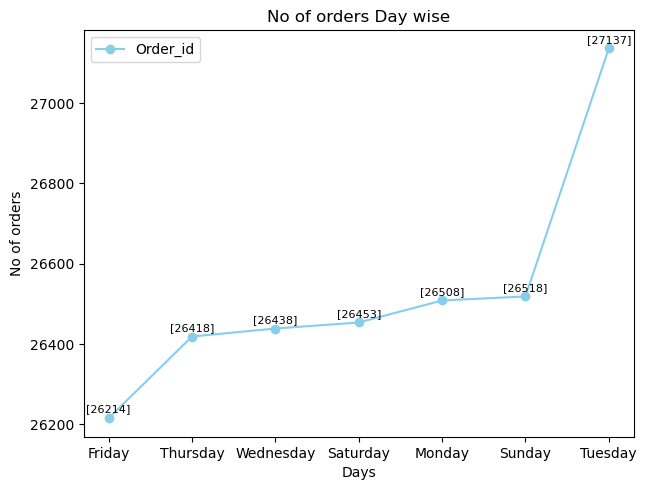

In [298]:
offset=10
sale_day.plot(color='skyblue',marker='o',linestyle='-')

for i,j in enumerate(sale_day.values):
    plt.text(i,j+offset,str(j),ha='center',va='bottom',fontsize=8)

plt.tight_layout()
plt.title('No of orders Day wise')
plt.xlabel('Days')
plt.ylabel('No of orders')
plt.show()

 On tuesday maxium orders are places, friday has lowest number of orders.
 Increase the inventory on Sunday , Monday and Tuesday due to high sales which can help in effective inventory management. 

In [388]:
#Finding Top 5 most sold products

In [305]:
df.head()

,Order_id,Product_name,Quantity_Ordered,Product_price,Order_date,Purchase_address,Month_name,month_name,Dates,Time,Day,Hour,Street,City,State,ZIP
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX,,75001",April,Apr,2019-04-19,08:46:00,Friday,8,917 1st St,Dallas,TX,75001
2,176559,Bose SoundSport Headphones,1,99.990000,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA,,02215",April,Apr,2019-04-07,22:30:00,Sunday,22,682 Chestnut St,Boston,MA,02215
3,176560,Google Phone,1,184.519255,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA,,90001",April,Apr,2019-04-12,14:38:00,Friday,14,669 Spruce St,Los Angeles,CA,90001
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA,,90001",April,Apr,2019-04-12,14:38:00,Friday,14,669 Spruce St,Los Angeles,CA,90001
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA,,90001",April,Apr,2019-04-30,09:27:00,Tuesday,9,333 8th St,Los Angeles,CA,90001


In [307]:
top_sale_product=df[['Product_name','Quantity_Ordered']].groupby('Product_name').sum().sort_values('Quantity_Ordered',ascending=False).head(5)
top_sale_product
                     

,Quantity_Ordered
Product_name,
AAA Batteries (4-pack),30986
AA Batteries (4-pack),27615
USB-C Charging Cable,23931
Lightning Charging Cable,23169
Wired Headphones,20524


C:\Users\nayan\AppData\Local\Temp\ipykernel_18760\980180472.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Blues')


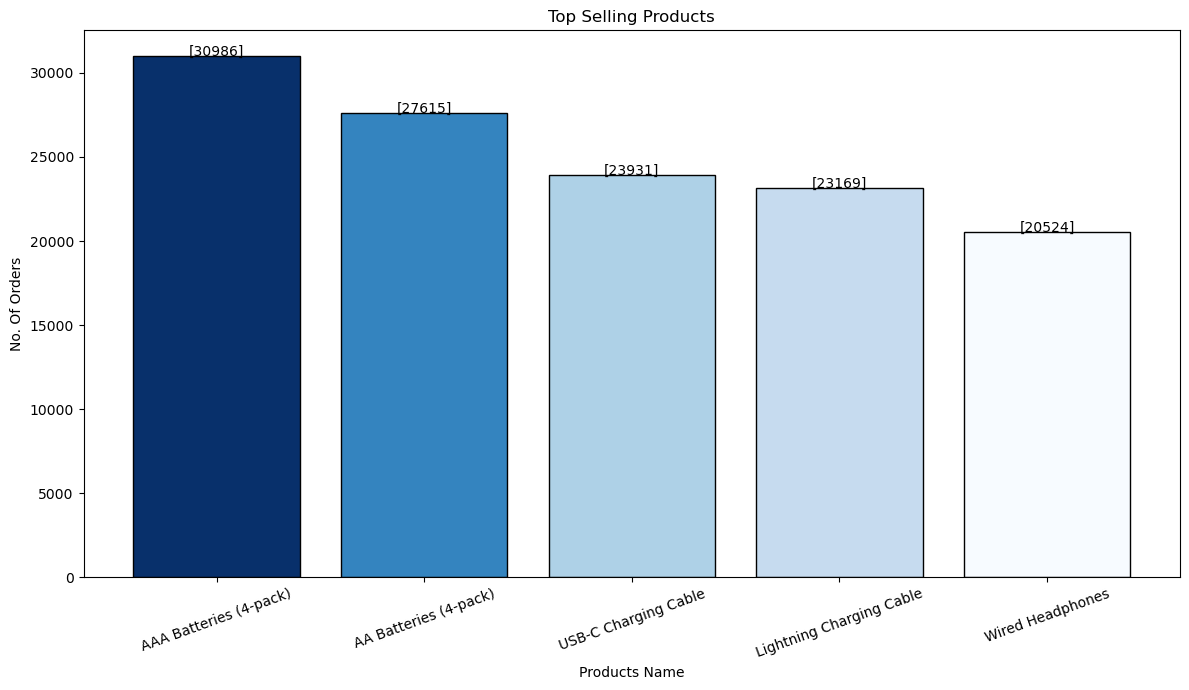

In [311]:
# Define colormap with varying saturation levels
cmap = cm.get_cmap('Blues')

# Normalize data
normalize = plt.Normalize(vmin=top_sale_product['Quantity_Ordered'].min(), vmax=top_sale_product['Quantity_Ordered'].max())

# Plot the bar plot
plt.figure(figsize=(12, 7))
plt.bar(x=top_sale_product.index, height=top_sale_product['Quantity_Ordered'], 
               color=cmap(normalize(top_sale_product['Quantity_Ordered'])), edgecolor='black')


# add values top of bars
for i,j in enumerate(top_sale_product.values):
    plt.text(top_sale_product.index[i], top_sale_product.values[i]+offset,str(j),ha='center')

plt.title('Top Selling Products')
plt.xlabel('Products Name')
plt.ylabel('No. Of Orders')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

Batteries are the most sold products followed by charging cables and headphones. We can introduce new varierty in these product to boost our sales further.

In [313]:
# These are the top 5 products and we can use various measures to increase the sales

In [317]:
state_order=df[['Order_id','State']].groupby('State').count().sort_values('Order_id',ascending=False)
percent_order=(state_order/state_order.sum()*100).round(2)
percent_order

,Order_id
State,
CA,39.97
NY,13.38
TX,13.30
MA,10.72
GA,8.00
WA,7.92
OR,5.38
ME,1.32


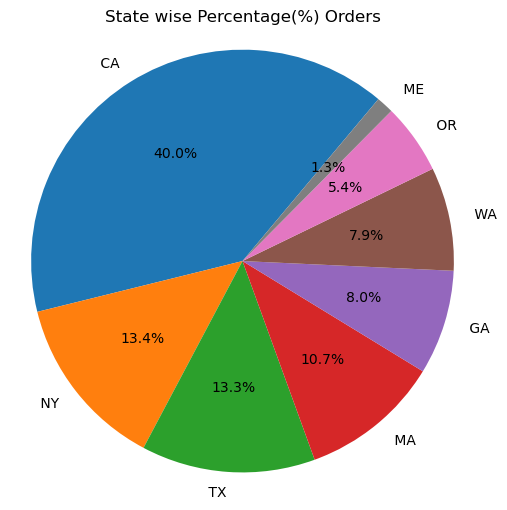

In [323]:


plt.figure(figsize=(6,6))  # Optional: Adjust the size of the pie chart
plt.pie(percent_order['Order_id'], labels=percent_order.index, autopct='%1.1f%%', startangle=50) 

plt.title('State wise Percentage(%) Orders')  # Optional: Add a title
plt.axis('equal') 
plt.show()

 Califoria , Texas and New York contribute in most of the sales. We can manage the inventory , sales according to this data.

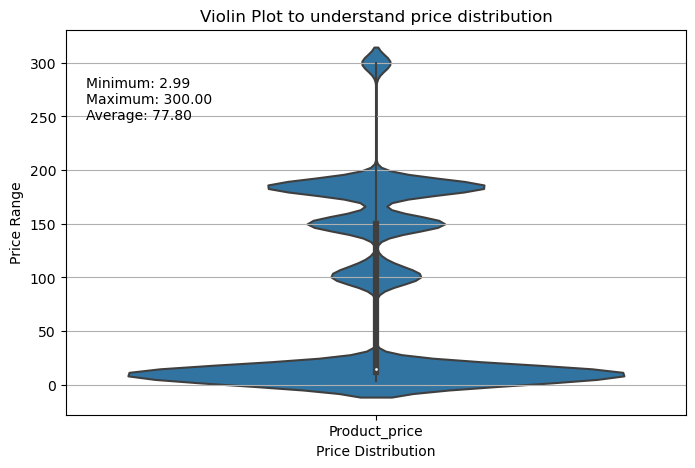

In [329]:
data=df[["Product_price"]]


plt.figure(figsize=(8,5))

# Create a violin plot
sns.violinplot(data)

minimum = np.min(data)
maximum = np.max(data)
average = np.mean(data)
                  
plt.title('Violin Plot to understand price distribution')
plt.xlabel('Price Distribution')
plt.ylabel('Price Range')
plt.figtext(0.15, 0.7, f'Minimum: {minimum:.2f}\nMaximum: {maximum:.2f}\nAverage: {average:.2f}', fontsize=10, ha='left')

plt.grid(axis='y')
plt.show()


Most products are between 2-40 rs range. They have the highest volume of sales. Maximum price is 300 and minimum price is 2.99. 

Understanding price distribution sales trend by histogram

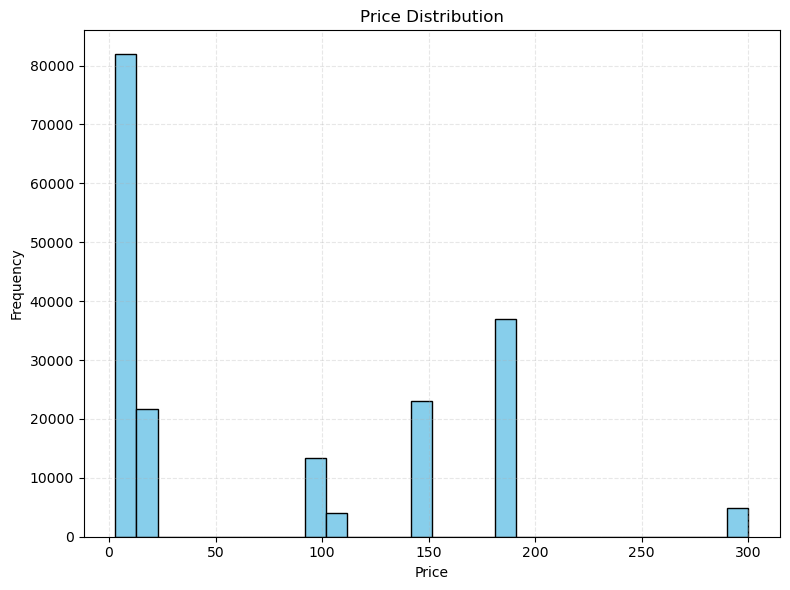

In [332]:
plt.figure(figsize=(8, 6))
prices=df['Product_price']
plt.hist(prices, bins=30, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


Understanding price distribution sales trends by KDE

C:\Users\nayan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


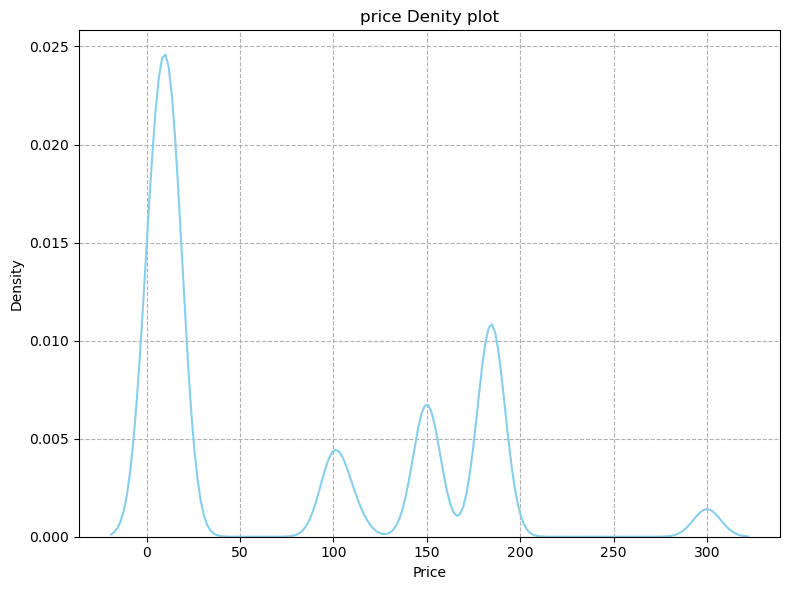

In [341]:
plt.figure(figsize=(8,6))
sns.kdeplot(prices,color='skyblue')
plt.title('price Denity plot')
plt.xlabel('Price')
plt.ylabel('Density')
plt.grid(True,linestyle='--')
plt.tight_layout()
plt.show()

In [343]:
# Products between 0-30 are sold highest , followed by in the range of 160-190

Find the correlation between quantity orderd and the product price

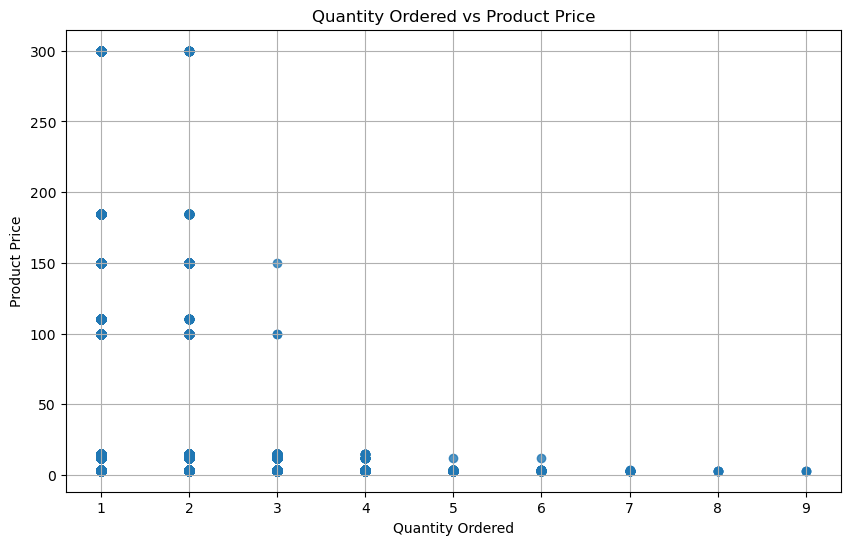

In [350]:
plt.figure(figsize=(10,6))
plt.scatter(df['Quantity_Ordered'],df['Product_price'],alpha=0.8)
plt.title('Quantity Ordered vs Product Price')
plt.xlabel('Quantity Ordered')
plt.ylabel('Product Price')
plt.grid(True)

plt.show()

 As such there is no correlation between quantity ordered and price. There can be no pattern determined between price and quantity ordered. 

In [356]:
quantity_by_product = df[['Quantity_Ordered','Product_name']].groupby('Product_name').sum().sort_values('Quantity_Ordered')
percentage_order_product= (quantity_by_product/quantity_by_product["Quantity_Ordered"].sum()*100).round(2)
percentage_order_product

,Quantity_Ordered
Product_name,
LG Dryer,0.31
LG Washing Machine,0.32
Vareebadd Phone,0.99
20in Monitor,1.98
ThinkPad Laptop,1.98
Macbook Pro Laptop,2.26
Flatscreen TV,2.30
Google Phone,2.65
34in Ultrawide Monitor,2.97


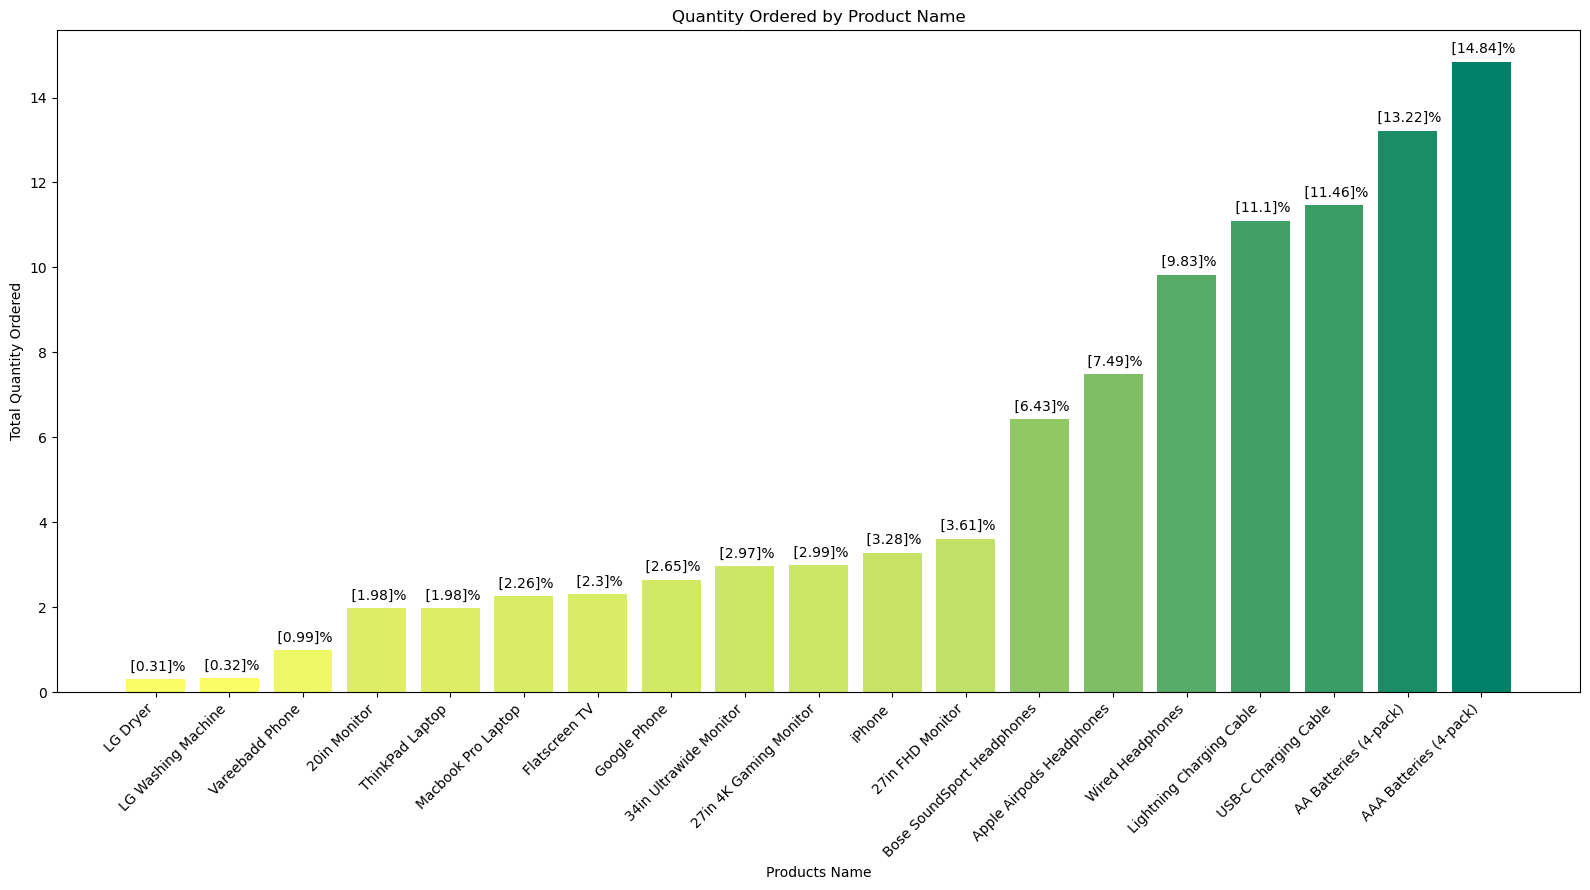

In [360]:
plt.figure(figsize=(16,9))

quantities=percentage_order_product['Quantity_Ordered']

# Normalize the quantities inversely to [0, 1] range
normalized_quantities = np.array(quantities) / max(quantities)

# Define a colormap
cmap = plt.get_cmap('summer_r')


plt.bar(x=percentage_order_product.index,height=percentage_order_product['Quantity_Ordered'] , color=cmap(normalized_quantities))

# Add values on the top of bars
for i,j in enumerate(percentage_order_product.values):
    plt.text(percentage_order_product.index[i],percentage_order_product.values[i]+.2,str(f" {j}%"),ha='center')
    
# Add color bar

plt.title('Quantity Ordered by Product Name')
plt.xlabel('Products Name')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

This graph shows the percentage share of products by quantity. With batteries, charging cables and earphones contributing in major sales. 

Product order trends each hours in day

In [363]:
time_order=df[['Quantity_Ordered','Hour']].groupby('Hour').sum()
time_order

,Quantity_Ordered
Hour,
0,4420
1,2616
2,1397
3,927
4,935
5,1492
6,2809
7,4547
8,6998


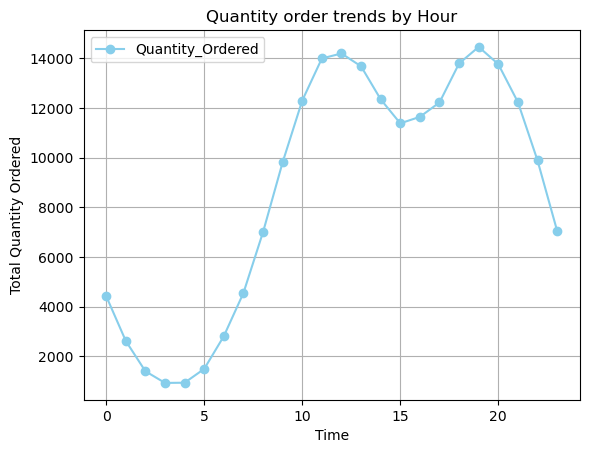

In [369]:
time_order.plot(kind='line',color='skyblue',marker='o',grid=True)
plt.title('Quantity order trends by Hour')
plt.xlabel('Time')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=0)
plt.show()

Peak hours between 10 am to 3 pm, quantity starts decreasing from 8pm. Also the orders are pretty less between 12 am to 5 am. The sales starts picking up and peaking at 11 am. Then after lunch again the sales starts to pick up. We can use marketing, inventory management according to these sales trends and reduce unneccasary cost. 

percentage product orders by each cities

In [374]:
Order_City= df[["City","Quantity_Ordered"]].groupby("City").sum().sort_values("Quantity_Ordered",ascending=False)
percentage_order= (Order_City/Order_City["Quantity_Ordered"].sum()*100).round(2)
percentage_order
Order_City


,Quantity_Ordered
City,
San Francisco,50169
Los Angeles,33247
New York City,27903
Boston,22494
Dallas,16707
Atlanta,16584
Seattle,16534
Portland,14037
Austin,11137


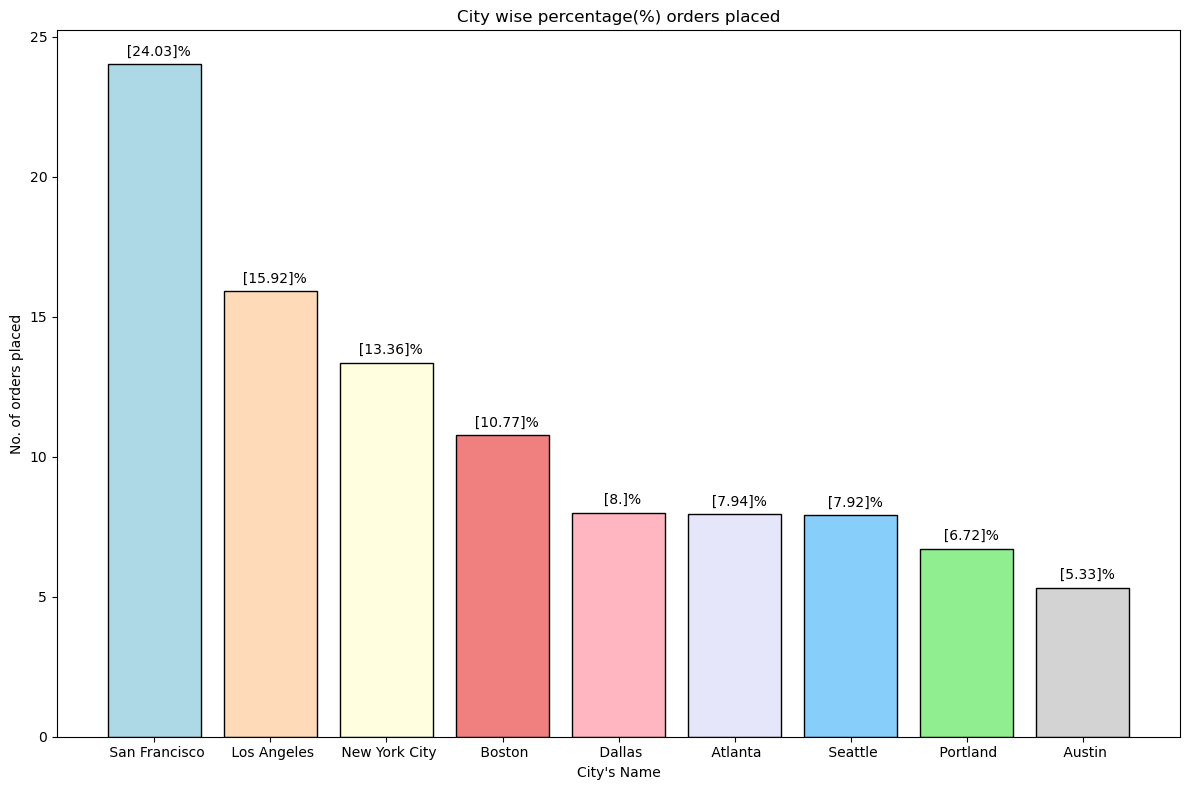

In [376]:
plt.figure(figsize=(12,8))
offset=.3
plt.bar(x=percentage_order.index,height=percentage_order["Quantity_Ordered"],
        color = ["lightblue", "peachpuff", "lightyellow", "lightcoral", "lightpink", "lavender", "lightskyblue",
                 "lightgreen", "lightgray"],edgecolor='black')

for i,j in enumerate(percentage_order.values):
       plt.text(percentage_order.index[i],percentage_order.values[i]+offset,str(f"  {j}%"),ha="center")

plt.title("City wise percentage(%) orders placed")
plt.xlabel("City's Name")
plt.ylabel("No. of orders placed")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

San Fransico, Los Angeles , New York City are top 3 cities according to no of orders placed. We can improve our marketing in low share cities to increase their share. Also we can identify problems at low share cities 

In [399]:
#States contributing more on sales and order quantity

In [381]:
state_quantity_price=df[["State","Product_price","Quantity_Ordered"]].groupby("State").sum()

state_quantity_price["Percent Sales"]=state_quantity_price["Product_price"]/state_quantity_price["Product_price"].sum()*100
state_quantity_price["Percentage Orders"]=state_quantity_price["Quantity_Ordered"]/state_quantity_price["Quantity_Ordered"].sum()*100
state_quantity_price.drop(columns=["Product_price","Quantity_Ordered"],inplace=True)
state_quantity_price

,Percent Sales,Percentage Orders
State,,
CA,39.749607,39.947896
GA,8.088915,7.942072
MA,10.688698,10.772369
ME,1.331012,1.315059
NY,13.466587,13.362738
OR,5.372485,5.407256
TX,13.278902,13.334483
WA,8.023795,7.918127


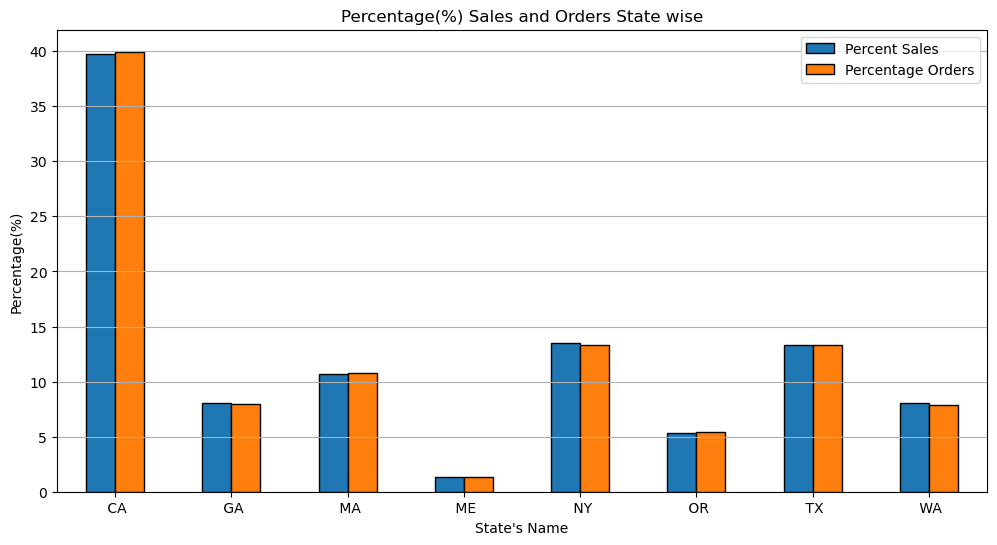

In [383]:
state_quantity_price.plot(kind="bar",edgecolor="black",figsize=(12, 6))

plt.title("Percentage(%) Sales and Orders State wise")
plt.ylabel("Percentage(%)")
plt.xlabel("State's Name")
plt.xticks(rotation=0)
plt.grid(axis='y')
#plt.tight_layout()
plt.show()


Almost same percentage of sales and order states that every state is contributing to their overall sales with equal average price with respect to sales. No state is having low orders and more sales. This means expensive items are not bought that much by a particular state.